In [1]:
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/peruvian-national-football-team-results/peru_match_results.csv'
peru_df = pd.read_csv(file_path)

# Display column names and first few rows of the dataset
print("Columns in the dataset:")
print(peru_df.columns)

print("\nFirst few rows of the dataset:")
print(peru_df.head())


Columns in the dataset:
Index(['match_id', 'rival', 'rival_confederation', 'peru_score', 'rival_score',
       'peru_awarded_score', 'rival_awarded_score', 'result',
       'shootout_result', 'awarded_result', 'tournament_name',
       'tournament_type', 'official', 'stadium', 'city', 'country',
       'elevation', 'peru_condition', 'coach', 'coach_nationality', 'date'],
      dtype='object')

First few rows of the dataset:
  match_id      rival rival_confederation  peru_score  rival_score  \
0    M0001    Uruguay            CONMEBOL           0            4   
1    M0002    Bolivia            CONMEBOL           3            2   
2    M0003  Argentina            CONMEBOL           1            5   
3    M0004  Argentina            CONMEBOL           0            3   
4    M0005    Uruguay            CONMEBOL           1            4   

   peru_awarded_score  rival_awarded_score result shootout_result  \
0                   0                    4      L             NaN   
1            

In [2]:
# Display basic statistics and information about the dataset
print("Basic Information about the dataset:")
print(peru_df.info())

print("\nBasic Statistics of the dataset:")
print(peru_df.describe(include='all'))


Basic Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695 entries, 0 to 694
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             695 non-null    object
 1   rival                695 non-null    object
 2   rival_confederation  695 non-null    object
 3   peru_score           695 non-null    int64 
 4   rival_score          695 non-null    int64 
 5   peru_awarded_score   695 non-null    int64 
 6   rival_awarded_score  695 non-null    int64 
 7   result               695 non-null    object
 8   shootout_result      5 non-null      object
 9   awarded_result       695 non-null    object
 10  tournament_name      428 non-null    object
 11  tournament_type      428 non-null    object
 12  official             695 non-null    bool  
 13  stadium              695 non-null    object
 14  city                 695 non-null    object
 15  country             

In [3]:
# Check for missing values
missing_values = peru_df.isnull().sum()
print("Missing Values in each column:")
print(missing_values)

# Fill missing values for 'shootout_result' and 'awarded_result' with 'None'
peru_df['shootout_result'].fillna('None', inplace=True)
peru_df['awarded_result'].fillna('None', inplace=True)

# Verify missing values have been handled
print("\nMissing Values after filling:")
print(peru_df.isnull().sum())


Missing Values in each column:
match_id                 0
rival                    0
rival_confederation      0
peru_score               0
rival_score              0
peru_awarded_score       0
rival_awarded_score      0
result                   0
shootout_result        690
awarded_result           0
tournament_name        267
tournament_type        267
official                 0
stadium                  0
city                     0
country                  0
elevation                0
peru_condition           0
coach                    0
coach_nationality        0
date                     0
dtype: int64

Missing Values after filling:
match_id                 0
rival                    0
rival_confederation      0
peru_score               0
rival_score              0
peru_awarded_score       0
rival_awarded_score      0
result                   0
shootout_result          0
awarded_result           0
tournament_name        267
tournament_type        267
official                 0
stadium

/tmp/ipykernel_33/3873508542.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  peru_df['shootout_result'].fillna('None', inplace=True)
/tmp/ipykernel_33/3873508542.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

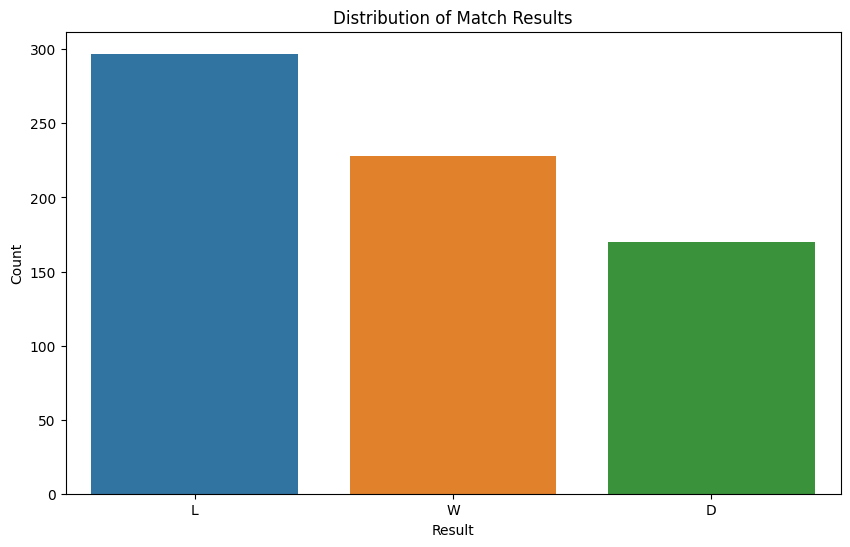

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of match results
plt.figure(figsize=(10, 6))
sns.countplot(data=peru_df, x='result')
plt.title('Distribution of Match Results')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()


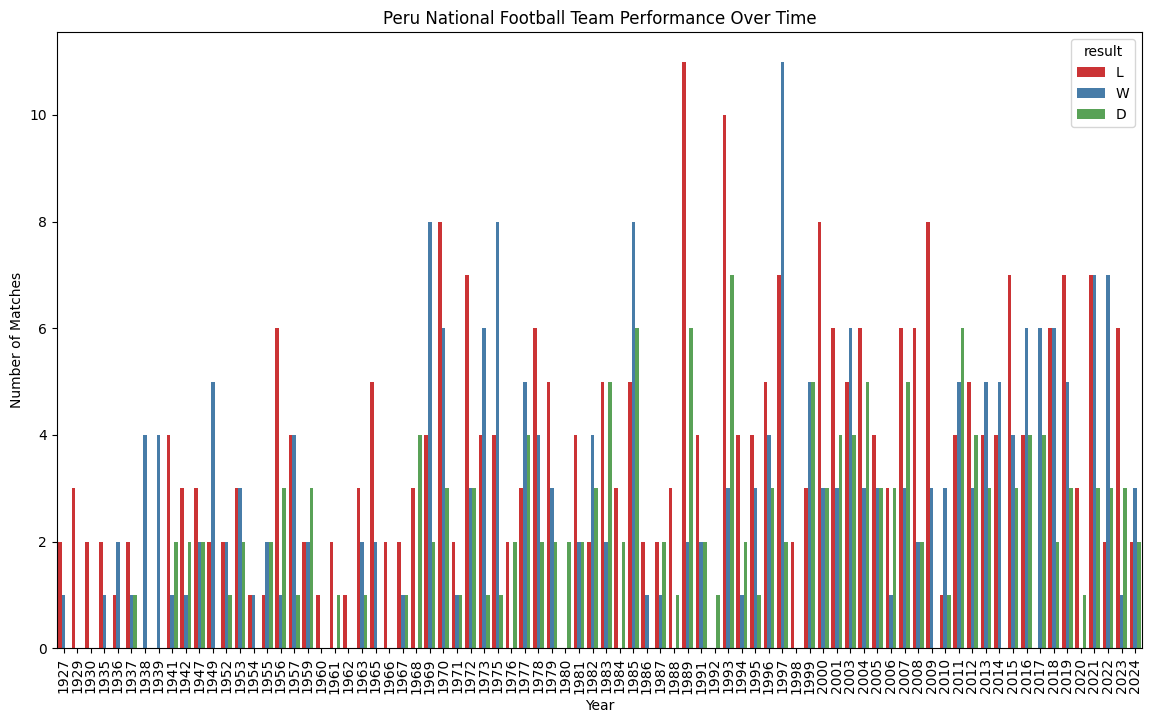

In [5]:
# Convert 'date' column to datetime
peru_df['date'] = pd.to_datetime(peru_df['date'])

# Extract year from 'date' column
peru_df['year'] = peru_df['date'].dt.year

# Plot Peru's performance over time
plt.figure(figsize=(14, 8))
sns.countplot(data=peru_df, x='year', hue='result', palette='Set1')
plt.title('Peru National Football Team Performance Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.xticks(rotation=90)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


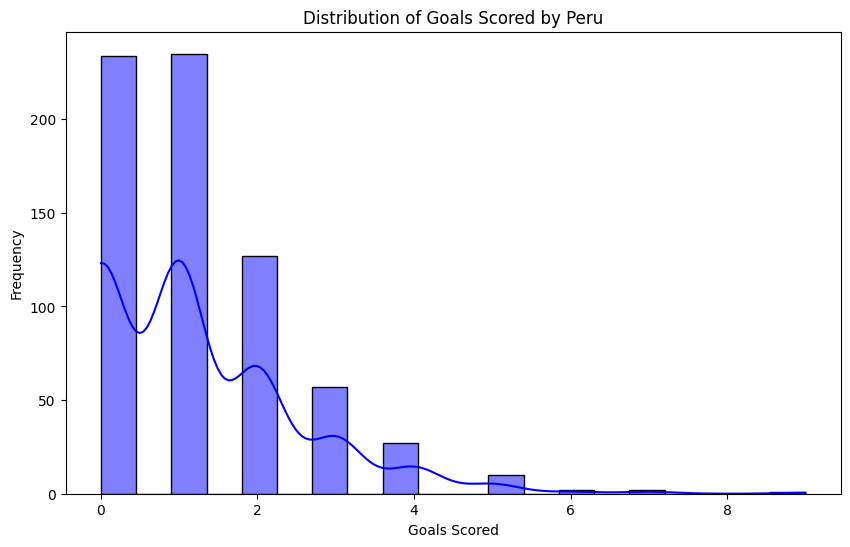

In [6]:
# Goals scored by Peru in each match
plt.figure(figsize=(10, 6))
sns.histplot(peru_df['peru_score'], kde=True, color='blue')
plt.title('Distribution of Goals Scored by Peru')
plt.xlabel('Goals Scored')
plt.ylabel('Frequency')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


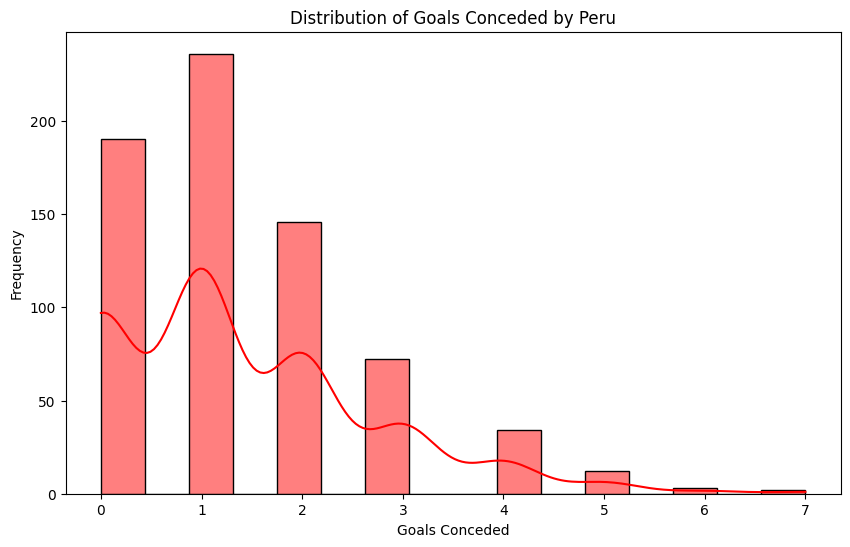

In [7]:
# Goals conceded by Peru in each match
plt.figure(figsize=(10, 6))
sns.histplot(peru_df['rival_score'], kde=True, color='red')
plt.title('Distribution of Goals Conceded by Peru')
plt.xlabel('Goals Conceded')
plt.ylabel('Frequency')
plt.show()


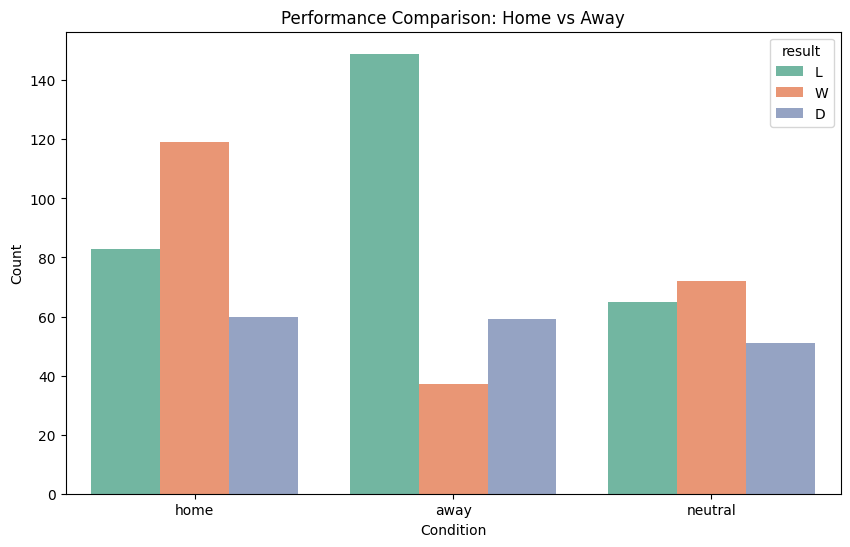

In [8]:
# Performance comparison: Home vs Away
plt.figure(figsize=(10, 6))
sns.countplot(data=peru_df, x='peru_condition', hue='result', palette='Set2')
plt.title('Performance Comparison: Home vs Away')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()


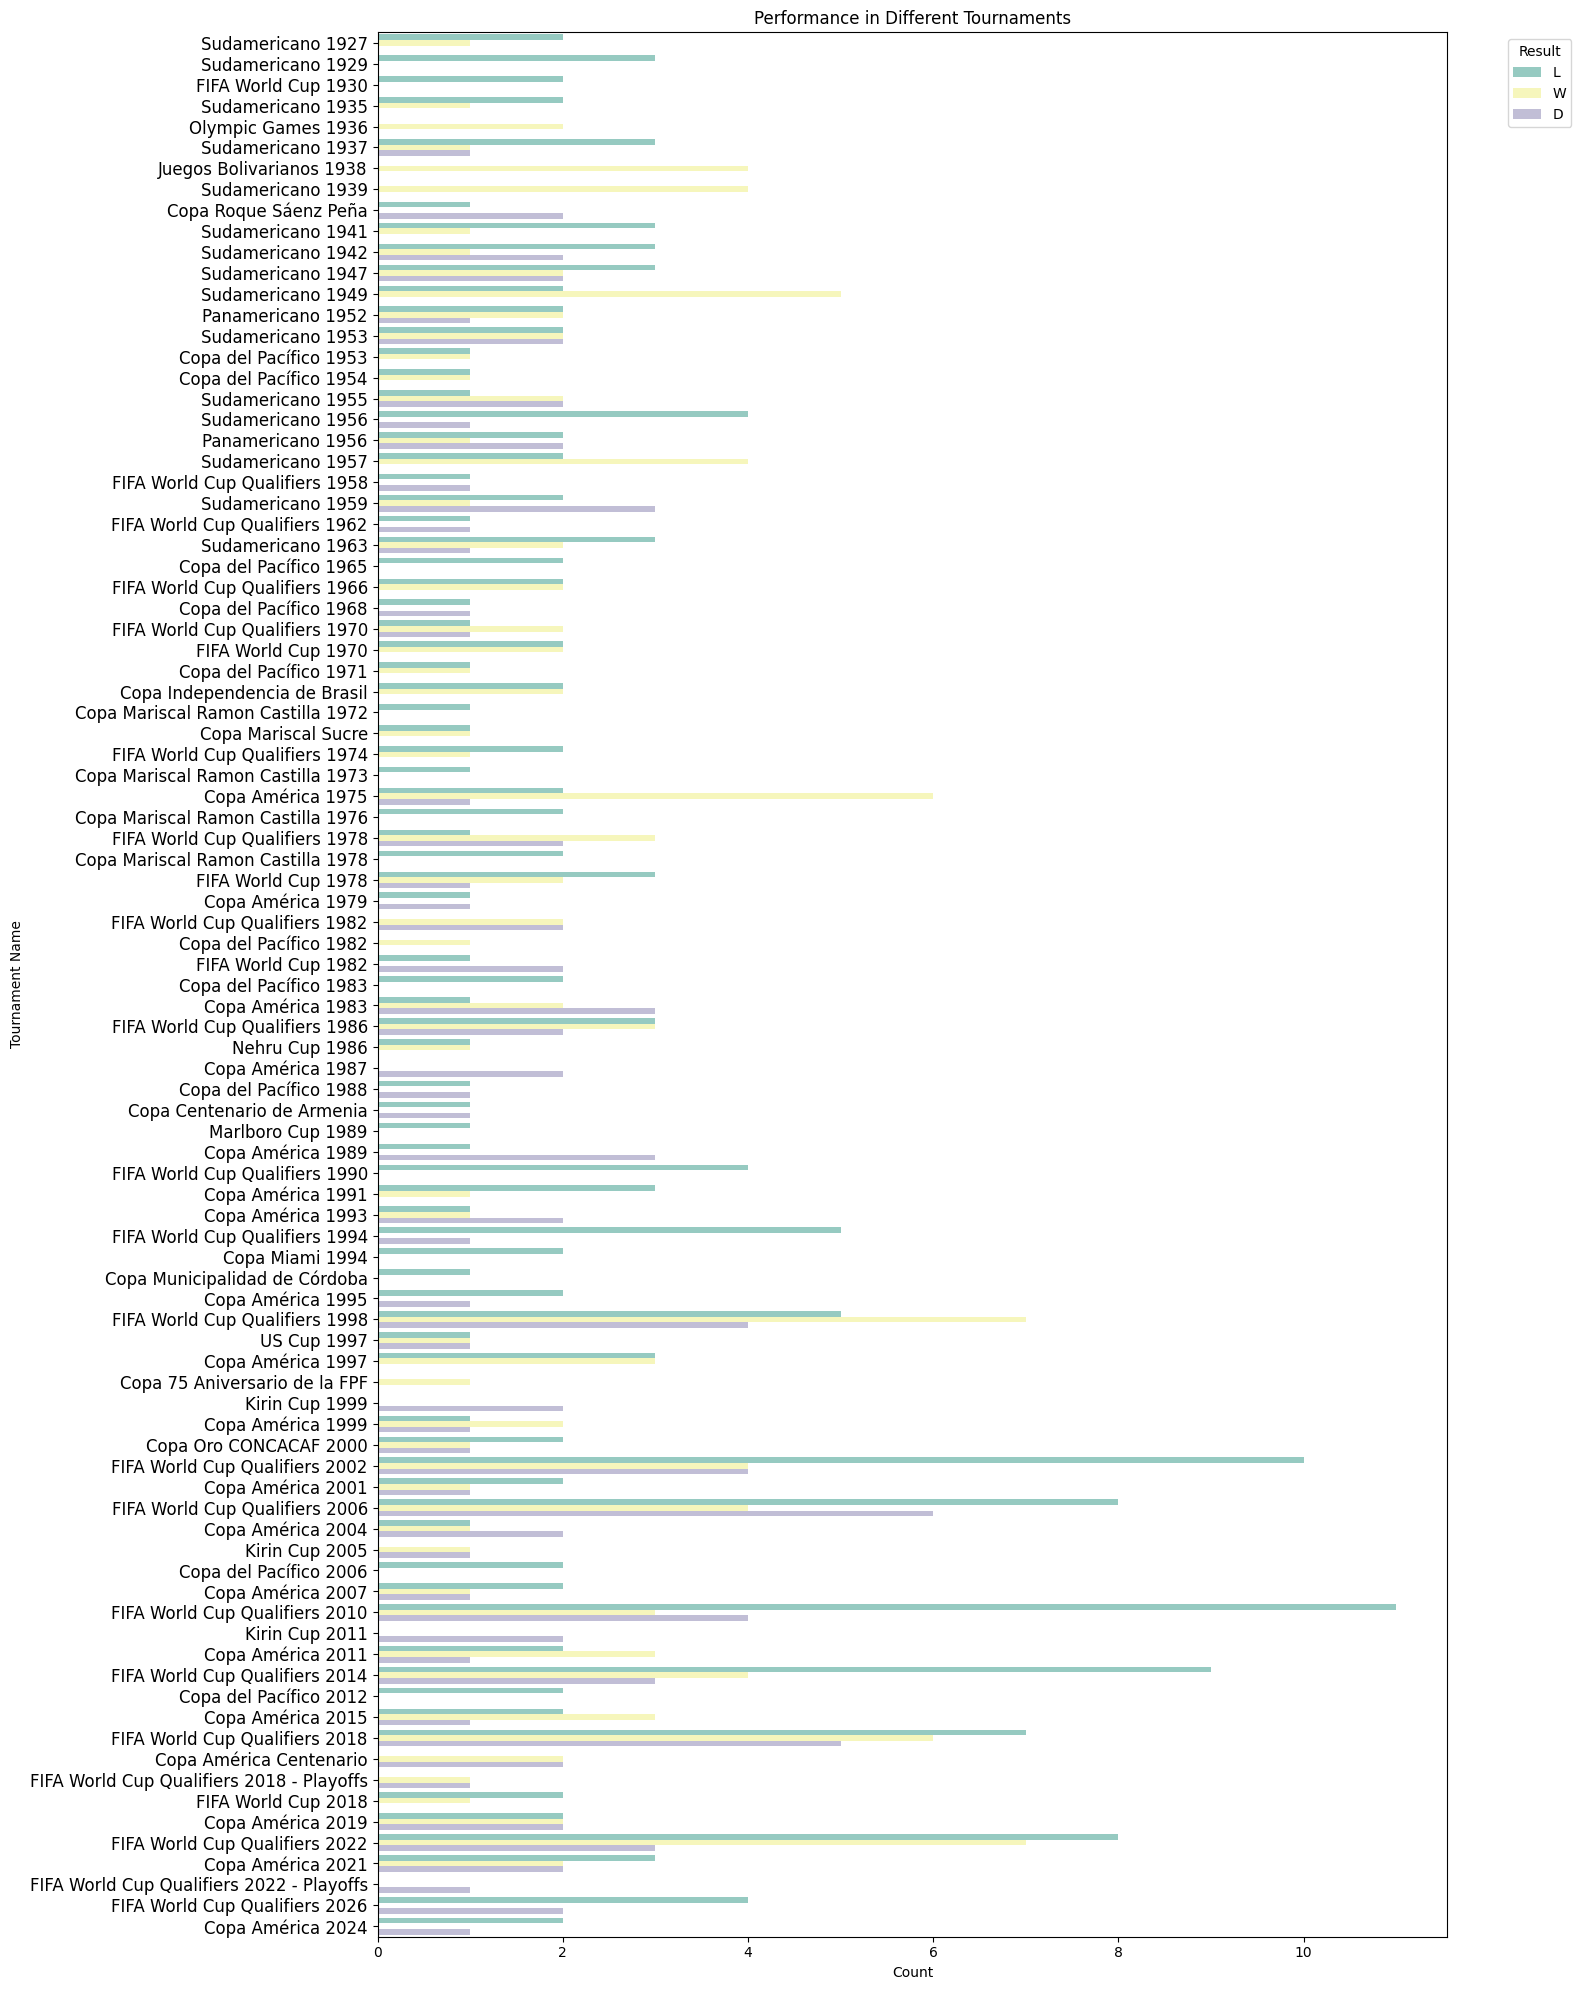

In [9]:
# Performance in different tournaments
plt.figure(figsize=(16, 20))  # Increase figure height to accommodate more tournaments
sns.countplot(data=peru_df, y='tournament_name', hue='result', palette='Set3')
plt.title('Performance in Different Tournaments')
plt.xlabel('Count')
plt.ylabel('Tournament Name')
plt.legend(title='Result', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the y-axis tick labels
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


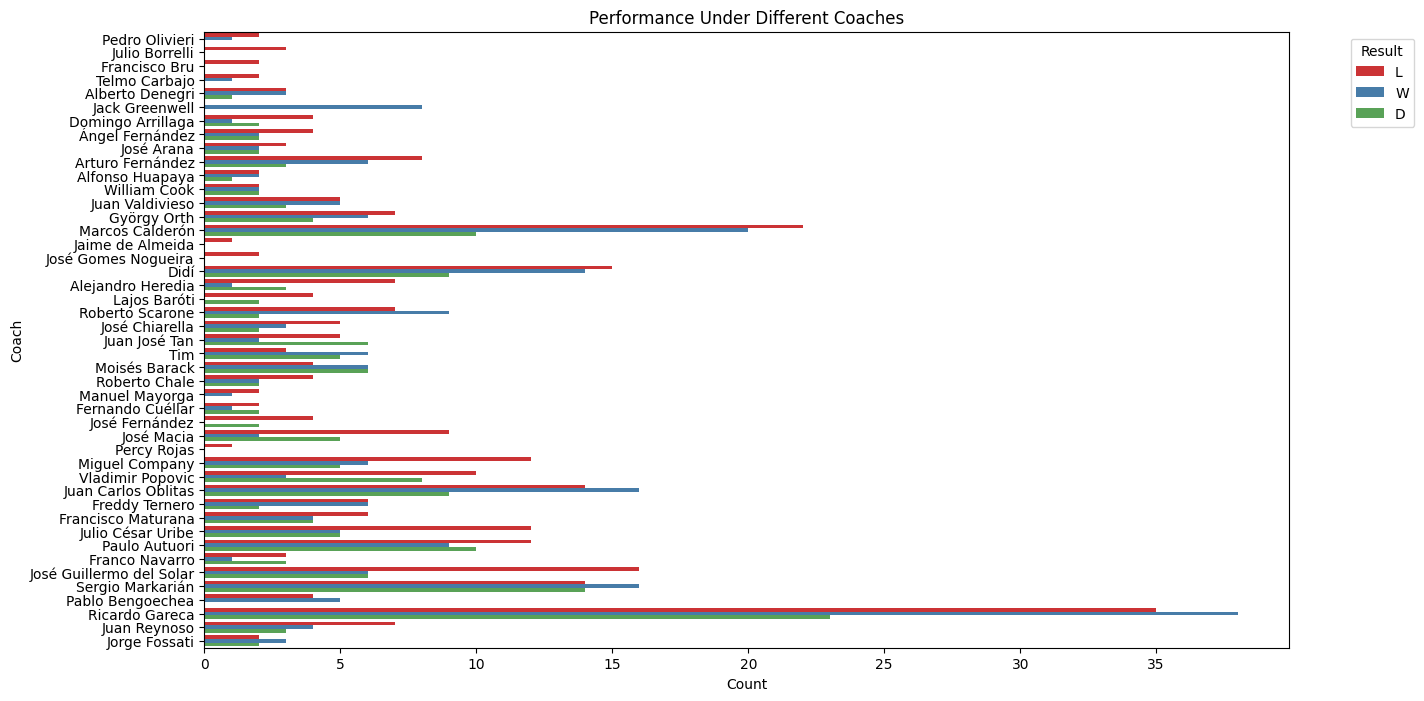

In [10]:
# Performance under different coaches
plt.figure(figsize=(14, 8))
sns.countplot(data=peru_df, y='coach', hue='result', palette='Set1')
plt.title('Performance Under Different Coaches')
plt.xlabel('Count')
plt.ylabel('Coach')
plt.legend(title='Result', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


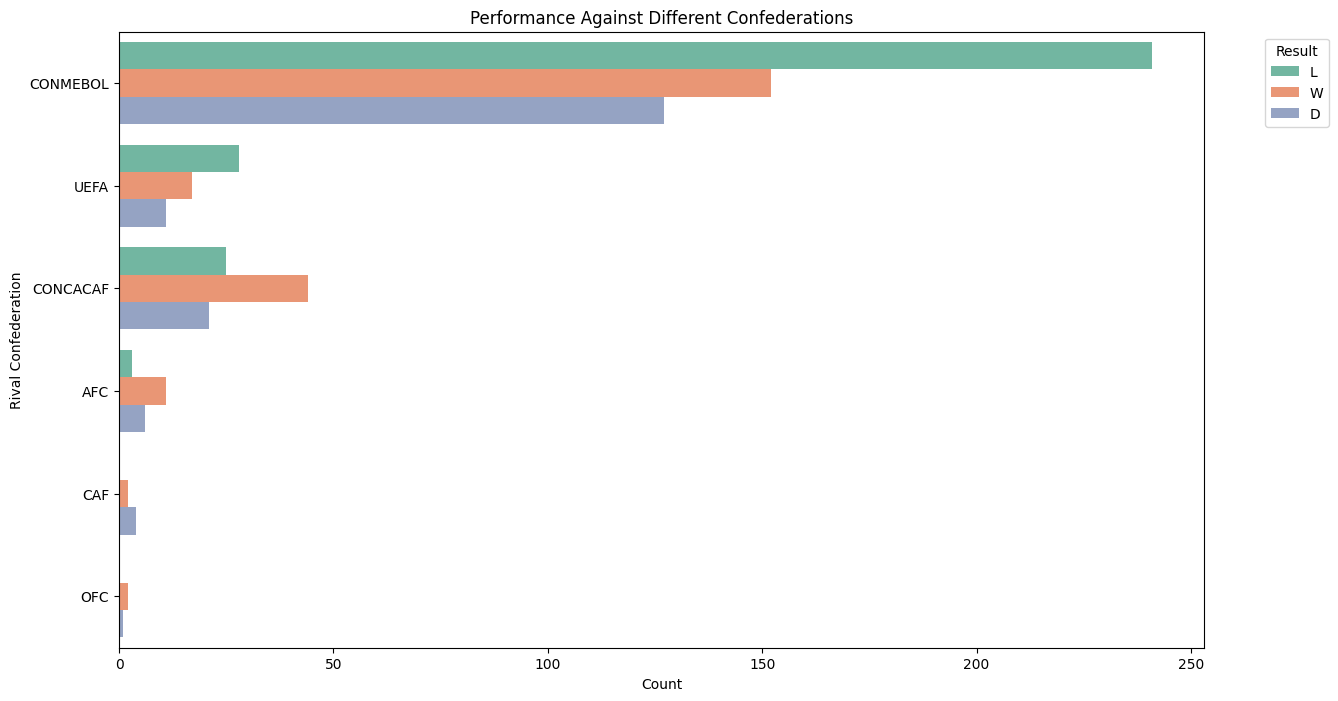

In [11]:
# Performance against different confederations
plt.figure(figsize=(14, 8))
sns.countplot(data=peru_df, y='rival_confederation', hue='result', palette='Set2')
plt.title('Performance Against Different Confederations')
plt.xlabel('Count')
plt.ylabel('Rival Confederation')
plt.legend(title='Result', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


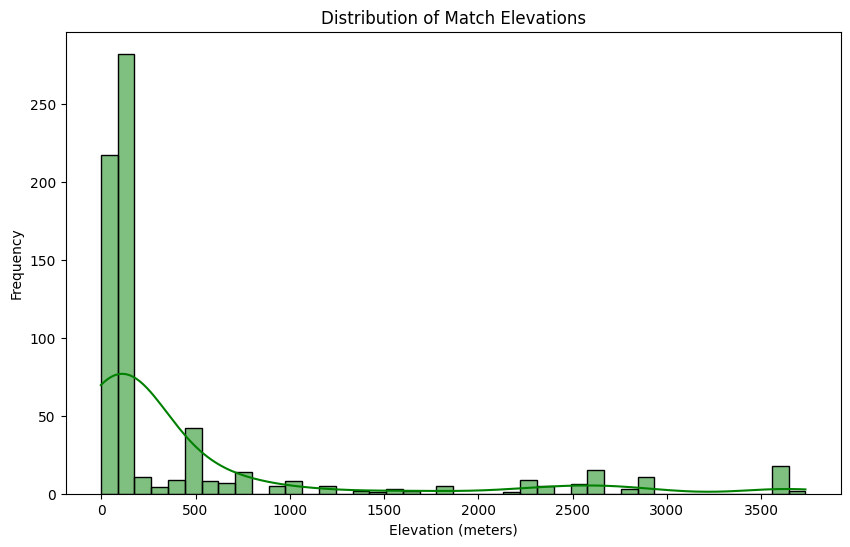

In [12]:
# Performance at different elevations
plt.figure(figsize=(10, 6))
sns.histplot(peru_df['elevation'].dropna(), kde=True, color='green')
plt.title('Distribution of Match Elevations')
plt.xlabel('Elevation (meters)')
plt.ylabel('Frequency')
plt.show()
